[실습]
아래 식을 만족하는 데이터 셋을 생성하고, 학습하는 모델 만들기

$y = \frac{2}{1+e^{-(2x+1)}} + 1$ ----> (식1)

아래와 같이 풀어 쓸 수 있음

$x$ ----> input

$x_1 = 2x + 1$    ----> Dense layer (d1) ---> weight는 (2,1)

$x_2 = \frac{1}{1+e^{-x_1}}$   ----> Activation function: sigmoid

$y = 2x_2 + 1$    ----> Dense layer (d2) ---> weight는 (2,1)

(식1)은 아래와 같이 변형이 가능하다.

분모, 분자에 $e^{2x+1}$을 곱하면,

$=\frac{2e^{2x+1}}{1+e^{2x+1}}+1$

분자에 +2, -2를 추가하면,

$=\frac{2(1+e^{2x+1})-2}{1+e^{2x+1}}+1$

$=2+\frac{-2}{1+e^{2x+1}}+1$

$=\frac{-2}{1+e^{2x+1}}+3$

$=-2\frac{1}{1+e^{-(-2x-1)}}+3$

이를 다시 풀어쓰면,

$x$ ----> input

$x_1 = -2x - 1$    ----> Dense layer (d1) ---> weight는 (-2,-1)

$x_2 = \frac{1}{1+e^{-x_1}}$   ----> Activation function: sigmoid

$y = -2x_2 + 3$    ----> Dense layer (d2) ---> weight는 (-2,3)

결론적으로, 학습이 완료되면,<br>
d1의 weight는 (2,1) 또는 (-2,-1) 이고,<br>
d2의 weight는 (2,1) 또는 (-3,3) 이다.

Using TensorFlow backend.


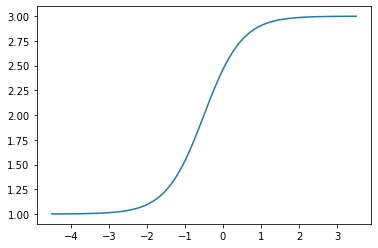

In [1]:
%matplotlib inline

import keras
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 / (1 + np.exp(-(2*x + 1))) + 1

# f(x) 함수 확인
x = np.linspace(-0.5-4, -0.5+4, num=100)
plt.plot(x, f(x))
plt.show()

In [2]:
x_train = np.random.rand(1024,1)*10-5
y_train = f(x_train)

x_test = np.linspace(-0.5-2, -0.5+2, num=5).reshape((-1,1))
y_test = f(x_test)
print(x_test)
print(y_test)

[[-2.5]
 [-1.5]
 [-0.5]
 [ 0.5]
 [ 1.5]]
[[1.03597242]
 [1.23840584]
 [2.        ]
 [2.76159416]
 [2.96402758]]


In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, name='d1', input_dim=1))
model.add(keras.layers.Activation('sigmoid', name='sigmoid'))
model.add(keras.layers.Dense(1, name='d2'))

model.summary()
sgd = keras.optimizers.SGD(lr=0.05)
model.compile(sgd, 'mse')
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
d1 (Dense)                   (None, 1)                 2         
_________________________________________________________________
sigmoid (Activation)         (None, 1)                 0         
_________________________________________________________________
d2 (Dense)                   (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Train on 819 samples, validate on 205 samples
Epoch 1/100
819/819 [==============================] - 3s 3ms/step - loss: 1.6170 - val_loss: 0.4500
Epoch 2/100
819/819 [==============================] - 0s 49us/step - loss: 0.3300 - val_loss: 0.2206
Epoch 3/100
819/819 [==============================] - 0s 50us/step - loss: 0.1608 - val_loss: 0.1096
Epoch 4/100
819/819 [==============================] - 0s 49u

819/819 [==============================] - 0s 49us/step - loss: 1.5523e-04 - val_loss: 1.5184e-04
Epoch 71/100
819/819 [==============================] - 0s 47us/step - loss: 1.5029e-04 - val_loss: 1.4398e-04
Epoch 72/100
819/819 [==============================] - 0s 45us/step - loss: 1.4467e-04 - val_loss: 1.3927e-04
Epoch 73/100
819/819 [==============================] - 0s 45us/step - loss: 1.3963e-04 - val_loss: 1.3441e-04
Epoch 74/100
819/819 [==============================] - 0s 45us/step - loss: 1.3466e-04 - val_loss: 1.3071e-04
Epoch 75/100
819/819 [==============================] - 0s 49us/step - loss: 1.2984e-04 - val_loss: 1.2509e-04
Epoch 76/100
819/819 [==============================] - 0s 47us/step - loss: 1.2528e-04 - val_loss: 1.1978e-04
Epoch 77/100
819/819 [==============================] - 0s 49us/step - loss: 1.2106e-04 - val_loss: 1.1672e-04
Epoch 78/100
819/819 [==============================] - 0s 45us/step - loss: 1.1675e-04 - val_loss: 1.1352e-04
Epoch 79/100
8

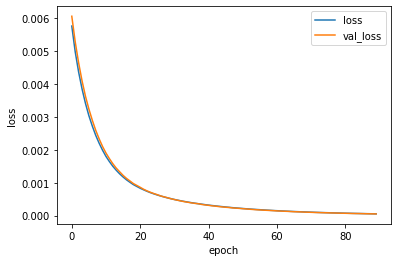

In [8]:
plt.plot(hist.history['loss'][10:], label='loss')
plt.plot(hist.history['val_loss'][10:], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc=0)

In [9]:
y_pred = model.predict(x_test)
print('y_pred'); print(y_pred)
print('y_test'); print(y_test)

y_pred
[[1.0368849]
 [1.2490577]
 [1.9944959]
 [2.7469583]
 [2.9637294]]
y_test
[[1.03597242]
 [1.23840584]
 [2.        ]
 [2.76159416]
 [2.96402758]]


In [10]:
d1_weights = model.get_layer('d1').get_weights()
d2_weights = model.get_layer('d2').get_weights()

print('d1_weights'); print(d1_weights)   # (2,1) 또는 (-2,-1)
print('d2_weights'); print(d2_weights)   # (2,1) 또는 (-2,3)

d1_weights
[array([[-1.9225469]], dtype=float32), array([-0.94868225], dtype=float32)]
d2_weights
[array([[-2.0110605]], dtype=float32), array([3.0063565], dtype=float32)]
